### Importação dos dados



In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()


,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [11]:
Precos1 = loja['Preço']
Precos2 = loja2['Preço']
Precos3 = loja3['Preço']
Precos4 = loja4['Preço']

lista_precos1 = Precos1.tolist()
lista_precos2 = Precos2.tolist()
lista_precos3 = Precos3.tolist()
lista_precos4 = Precos4.tolist()


In [12]:
def faturamento():
  faturamento1 = round(sum(lista_precos1),2)
  faturamento2 = round(sum(lista_precos2),2)
  faturamento3 = round(sum(lista_precos3),2)
  faturamento4 = round(sum(lista_precos4),2)
  return faturamento1, faturamento2, faturamento3, faturamento4

faturamento1, faturamento2, faturamento3, faturamento4 = faturamento()
faturamento_mean = round((faturamento1+faturamento2+faturamento3+faturamento4)/4,2)

print(f'A loja 1 gerou um faturamento de R$ {faturamento1:,.2f}')
print(f'A loja 2 gerou um faturamento de R$ {faturamento2:,.2f}')
print(f'A loja 3 gerou um faturamento de R$ {faturamento3:,.2f}')
print(f'A loja 4 gerou um faturamento de R$ {faturamento4:,.2f}')

print(f'O faturamento médio é de R$ {faturamento_mean:,.2f}')

A loja 1 gerou um faturamento de R$ 1,534,509.12
A loja 2 gerou um faturamento de R$ 1,488,459.06
A loja 3 gerou um faturamento de R$ 1,464,025.03
A loja 4 gerou um faturamento de R$ 1,384,497.58
O faturamento médio é de R$ 1,467,872.70


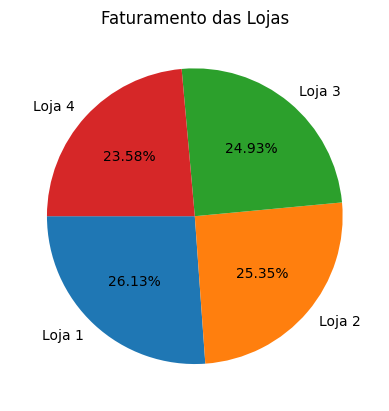

In [13]:
Lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
Faturamento = [faturamento1, faturamento2, faturamento3, faturamento4]

plt.pie(Faturamento, labels=Lojas, autopct='%1.2f%%', startangle=180)
plt.title('Faturamento das Lojas')
plt.show()

In [14]:
print(f'A loja 4 tem o menor faturamento de R$ {faturamento4:,.2f} e a loja 1 tem o maior faturamento de R$ {faturamento1:,.2f}')

A loja 4 tem o menor faturamento de R$ 1,384,497.58 e a loja 1 tem o maior faturamento de R$ 1,534,509.12


# 2. Vendas por Categoria


In [15]:
categorias1 = loja['Categoria do Produto'].value_counts()
categorias2 = loja2['Categoria do Produto'].value_counts()
categorias3 = loja3['Categoria do Produto'].value_counts()
categorias4 = loja4['Categoria do Produto'].value_counts()

categorias_soma = categorias1 + categorias2 + categorias3 + categorias4

categorias_juntas = pd.concat([categorias1, categorias2, categorias3, categorias4, categorias_soma], axis=1)
categorias_juntas.columns = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4','Soma']
categorias_juntas

,Loja 1,Loja 2,Loja 3,Loja 4,Soma
Categoria do Produto,,,,,
moveis,465,442,499,480,1886
eletronicos,448,422,451,451,1772
brinquedos,324,313,315,338,1290
eletrodomesticos,312,305,278,254,1149
esporte e lazer,284,275,277,277,1113
instrumentos musicais,182,224,177,170,753
livros,173,197,185,187,742
utilidades domesticas,171,181,177,201,730


In [16]:
maior_valor_por_categoria = categorias_juntas[['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']].max(axis=1)
loja_que_mais_vende = categorias_juntas[['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']].idxmax(axis=1)
resultado = pd.DataFrame({'Maior Venda': maior_valor_por_categoria, 'Loja': loja_que_mais_vende})
print(resultado)

                       Maior Venda    Loja
Categoria do Produto                      
moveis                         499  Loja 3
eletronicos                    451  Loja 3
brinquedos                     338  Loja 4
eletrodomesticos               312  Loja 1
esporte e lazer                284  Loja 1
instrumentos musicais          224  Loja 2
livros                         197  Loja 2
utilidades domesticas          201  Loja 4


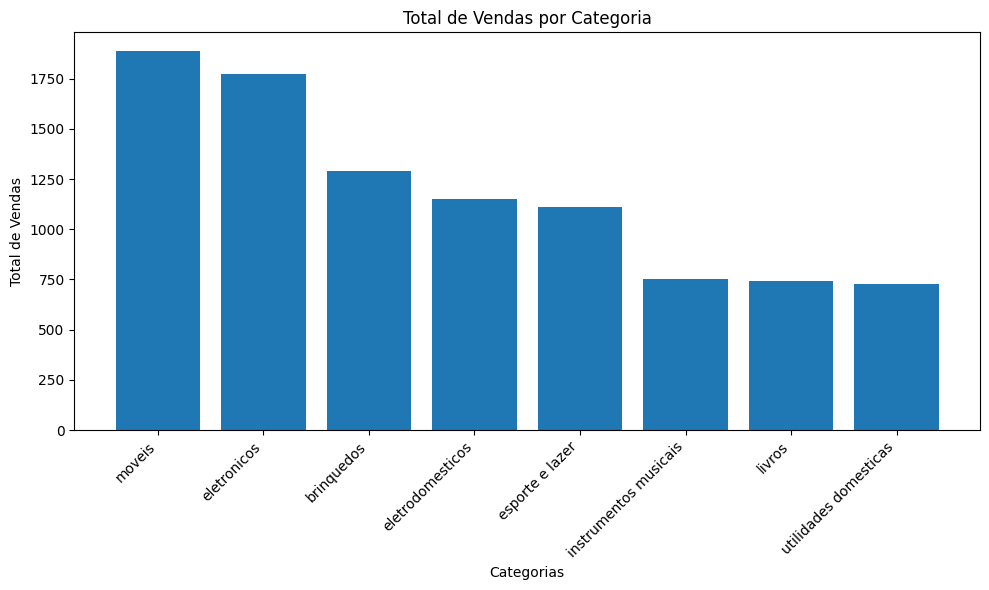

In [17]:
categorias = categorias_juntas.index #nome das categorias
somas = categorias_juntas['Soma']

plt.figure(figsize=(10, 6))
plt.bar(categorias, somas)
plt.xlabel("Categorias")
plt.ylabel("Total de Vendas")
plt.title("Total de Vendas por Categoria")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

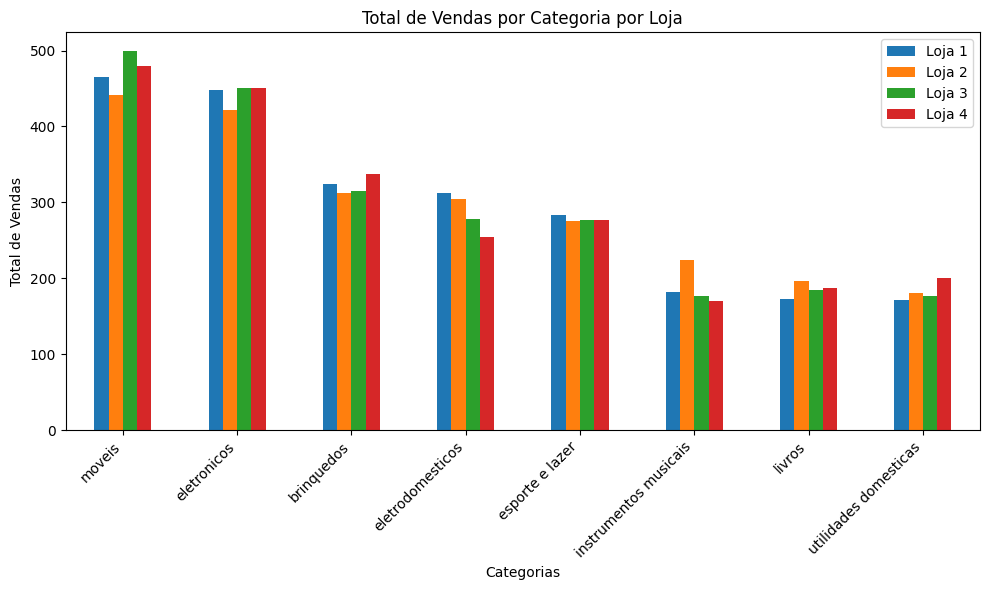

In [18]:

categorias_juntas[['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']].plot(kind='bar', figsize=(10, 6))
plt.xlabel("Categorias")
plt.ylabel("Total de Vendas")
plt.title("Total de Vendas por Categoria por Loja")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 3. Média de Avaliação das Lojas

In [19]:
avaliacao1 = round(loja['Avaliação da compra'].mean(),2)
avaliacao2 = round(loja2['Avaliação da compra'].mean(),2)
avaliacao3 = round(loja3['Avaliação da compra'].mean(),2)
avaliacao4 = round(loja4['Avaliação da compra'].mean(),2)

media = pd.DataFrame({'Loja': ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'], 'Média de Avaliação': [avaliacao1, avaliacao2, avaliacao3, avaliacao4]})
print(media)

     Loja  Média de Avaliação
0  Loja 1                3.98
1  Loja 2                4.04
2  Loja 3                4.05
3  Loja 4                4.00


# 4. Produtos Mais e Menos Vendidos

In [20]:
lojas = [loja, loja2, loja3, loja4]
resultados = []

for i, loja_atual in enumerate(lojas, 1):
    produtos = loja_atual['Produto'].value_counts()
    mais_vendido = produtos.index[0]
    menos_vendido = produtos.index[-1]

    preco_mais_vendido = loja_atual.loc[loja_atual['Produto'] == mais_vendido, 'Preço'].iloc[0]
    preco_menos_vendido = loja_atual.loc[loja_atual['Produto'] == menos_vendido, 'Preço'].iloc[0]

    resultados.append(f"Loja {i}: Mais vendido - {mais_vendido}, Preço: {preco_mais_vendido}, Menos vendido - {menos_vendido}, Preço: {preco_menos_vendido}")

for resultado in resultados:
    print(resultado)


Loja 1: Mais vendido - Micro-ondas, Preço: 1009.99, Menos vendido - Celular ABXY, Preço: 935.91
Loja 2: Mais vendido - Iniciando em programação, Preço: 78.08, Menos vendido - Jogo de tabuleiro, Preço: 203.95
Loja 3: Mais vendido - Kit banquetas, Preço: 447.99, Menos vendido - Blocos de montar, Preço: 46.27
Loja 4: Mais vendido - Cama box, Preço: 631.7, Menos vendido - Guitarra, Preço: 834.88


# 5. Frete Médio por Loja


In [21]:
fretes1 = loja['Frete'].mean()
fretes2 = loja2['Frete'].mean()
fretes3 = loja3['Frete'].mean()
fretes4 = loja4['Frete'].mean()

frete_medio = pd.DataFrame({'Loja': ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'], 'Frete Médio': [fretes1, fretes2, fretes3, fretes4]})
print(frete_medio)

     Loja  Frete Médio
0  Loja 1    34.691805
1  Loja 2    33.621941
2  Loja 3    33.074464
3  Loja 4    31.278997


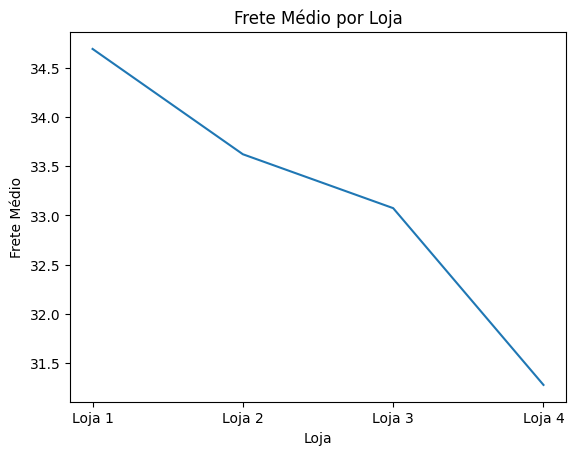

In [22]:
plt.plot(frete_medio['Loja'], frete_medio['Frete Médio'])
plt.xlabel('Loja')
plt.ylabel('Frete Médio')
plt.title('Frete Médio por Loja')
plt.show()



# Extra!  Análise de Desempenho Geográfico

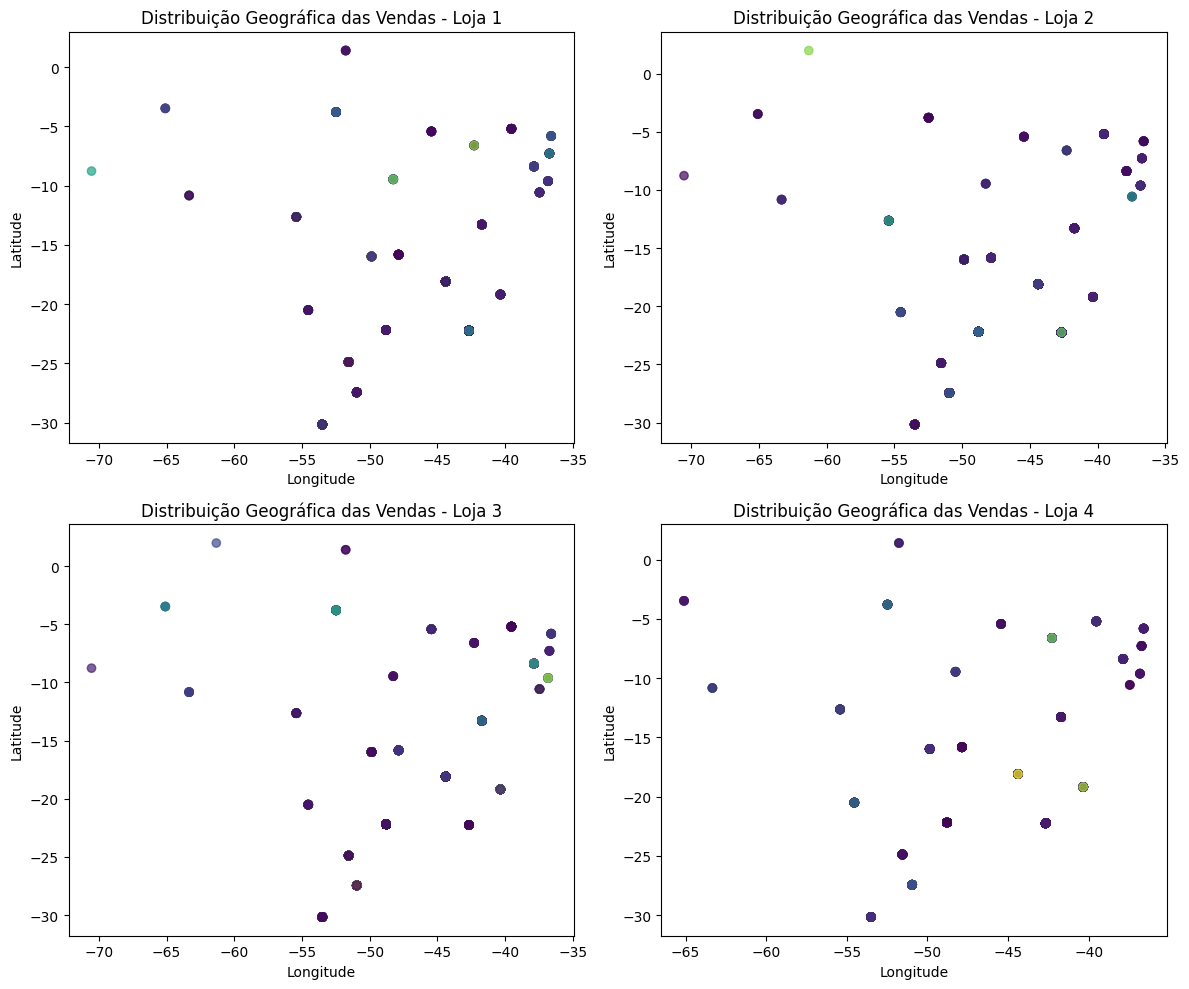

In [23]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plotar os dados da Loja 1
axes[0, 0].scatter(loja['lon'], loja['lat'], c=loja['Preço'], cmap='viridis', alpha=0.7)
axes[0, 0].set_xlabel('Longitude')
axes[0, 0].set_ylabel('Latitude')
axes[0, 0].set_title('Distribuição Geográfica das Vendas - Loja 1')

# Plotar os dados da Loja 2
axes[0, 1].scatter(loja2['lon'], loja2['lat'], c=loja2['Preço'], cmap='viridis', alpha=0.7)
axes[0, 1].set_xlabel('Longitude')
axes[0, 1].set_ylabel('Latitude')
axes[0, 1].set_title('Distribuição Geográfica das Vendas - Loja 2')

# Plotar os dados da Loja 3
axes[1, 0].scatter(loja3['lon'], loja3['lat'], c=loja3['Preço'], cmap='viridis', alpha=0.7)
axes[1, 0].set_xlabel('Longitude')
axes[1, 0].set_ylabel('Latitude')
axes[1, 0].set_title('Distribuição Geográfica das Vendas - Loja 3')

# Plotar os dados da Loja 4
axes[1, 1].scatter(loja4['lon'], loja4['lat'], c=loja4['Preço'], cmap='viridis', alpha=0.7)
axes[1, 1].set_xlabel('Longitude')
axes[1, 1].set_ylabel('Latitude')
axes[1, 1].set_title('Distribuição Geográfica das Vendas - Loja 4')


plt.tight_layout()
plt.show()

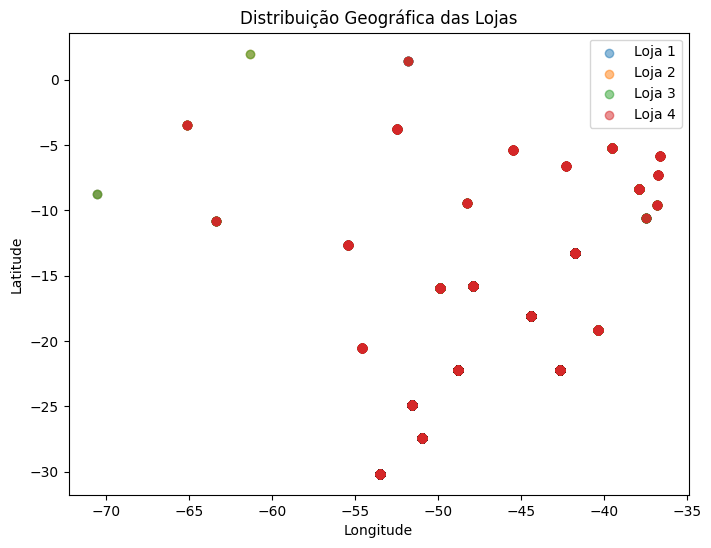

In [24]:
#Juntando os graficos

lojas = [loja, loja2, loja3, loja4]

plt.figure(figsize=(8, 6))

for i, loja_atual in enumerate(lojas, 1):
    plt.scatter(loja_atual['lon'], loja_atual['lat'], label=f'Loja {i}', alpha=0.5)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Distribuição Geográfica das Lojas')
plt.legend()
plt.show()

Contratante: João

Analista: Nickolas

Objetivo: Ajudar João a decidir qual das suas 4 lojas é mais adequada para fechar para que haja o menor prejuízo possível.

---
# Relatório Final

A pergunta do João não possui uma resposta pronta. Quando ele pergunta qual é a loja ideal para ser fechada, precisamos considerar diversas variáveis utilizando estatística para, de fato, ter segurança na nossa resposta.

Com isso, por meio do banco de dados das quatro unidades que foi repassado à nossa equipe, realizamos um breve estudo dos dados para entender quais variáveis temos para trabalhar, como elas estão organizadas e se relacionam.

A partir do estudo, separamos alguns fatores que poderiam ajudar a obter alguma conclusão segura para a pergunta do senhor João. Dentre esses fatores, destacamos o faturamento das lojas, o número de vendas, a avaliação dos consumidores, os produtos vendidos, o frete e a distribuição geográfica dos clientes.

---

## Análises

**Faturamento:** Realizamos um filtro para separar o faturamento das quatro lojas separadamente e aproveitamos para traçar a média de faturamento de todas elas. A conclusão dessa análise foi que a loja 1 possui o maior faturamento, com um valor que aproximadamente supera a média em 4,55%. Em contrapartida, a loja 4 possui o menor faturamento, com cerca de 5,68% abaixo da média. Quando calculamos a média e comparamos a diferença de cada faturamento em relação a ela, conseguimos entender como cada componente afeta positiva ou negativamente o resultado.

---

**Vendas:** Antes analisamos o faturamento, o que já indicou qual loja vende mais e qual vende menos. Contudo, vale observar quais itens são mais vendidos, pois isso influencia preço, impostos, frete e outros fatores.

Percebemos que móveis e eletrônicos são os itens mais vendidos, e a loja 3 é líder nesse segmento. Em seguida vêm brinquedos, eletrodomésticos, esporte e lazer, instrumentos musicais, livros e utilidades domésticas.

A loja 1 lidera vendas em eletrodomésticos e artigos de esporte e lazer, enquanto a loja 4 lidera em brinquedos e utilidades domésticas. Nesse sentido, a loja 1 se sai melhor tanto em quantidade de itens vendidos quanto em preço por unidade, o que provavelmente impacta seu faturamento.

---

**Avaliação:** Calculamos a média das avaliações dos clientes para cada loja, e o resultado ficou em torno de 4 estrelas. Contudo, todas as lojas possuem avaliações muito parecidas, com variação mínima, o que faz o teste resultar inconclusivo.

---

**Produtos:** Quando analisamos vendas, observamos que a loja 1 vendia mais itens e o preço por item era mais alto. A prova disso é que a loja 1 vende mais micro-ondas, que custam R\$ 1.009,99, mas não vende muito bem o celular ABxY. Já a loja 4 vende muito bem a cama box, no valor de R\$ 631,70, porém não vende bem guitarras.

---

**Frete:** Para a análise de frete, observamos que os valores médios das lojas ficaram muito próximos, com uma leve diferença entre as lojas 1 e 4. A loja 1 possui o frete mais caro, enquanto a loja 4 possui o frete mais barato. Esse resultado mostra que, na loja 1, os clientes moram mais longe ou compram produtos maiores (provavelmente eletrodomésticos), enquanto na loja 4 é nítido que os clientes estão próximos, pois o frete é menor e ela vende itens como cama box, que têm tamanho e peso consideráveis.

---

**Distribuição Geográfica:** A análise demonstra que os clientes compram principalmente das mesmas regiões (São Paulo e Nordeste) para todas as lojas, com pequenas flutuações na região ou no tipo de item. Contudo, é difícil tirar uma conclusão precisa, pois não temos o endereço das lojas para saber se as vendas são online ou presenciais.

---

## Observações adicionais

Entre todos esses fatores as loja 2 e 3 se demonstraram ser um meio termo entre entre os extremos (loja 1 e 4) discutidos. Portanto, não faz muito sentido alterar algo nelas pois elas são a média, representam como uma loja deveria se comportar naturalmente. Vale destacar apenas um fato curioso: A loja 2 possui menor numero de vendas em muitas categorias e nos casos em que ela lidera, a quantidade de itens vendidos é baixa e mesmo assim ela tem o segundo maior faturamento. As vezes os dados podem enganar!

---

## Conclusão Final

Portanto, respondendo à pergunta do João, acreditamos que a loja que deve ser vendida é a loja 4!

Os motivos para isso são que a loja 4 possui o menor faturamento de todas, ou seja, vende menos produtos e produtos mais baratos. Contudo, essa é uma decisão difícil, pois a loja 4 possui boa avaliação, provavelmente pelo fato de ter um relacionamento mais direto com seus clientes, estando mais perto deles (como observamos pelo menor valor de frete).

Ao vender a loja 4, também seria mais fácil transportar seus produtos para outra unidade, visto que o frete é mais barato. Contudo, em um cenário ideal em que os clientes permanecessem fiéis, seria necessário aumentar o frete das outras lojas para suprir as necessidades deles.

Entretanto, o problema do frete pode ser resolvido implementando uma central de distribuição ou estoque perto da região desses clientes e continuar vendendo online ou em outra loja mais próxima. Dessa forma, é possível manter o faturamento da loja 4 sem os custos de manter uma loja física adicional e sem aumentar significativamente o valor do frete das demais. O único gasto extra seria a gestão do estoque.